In [2]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
pd.options.display.max_rows = 1000
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import numpy as np
import datetime as dt
from statsmodels.tsa.stattools import acf

### 1) Data

In [ ]:
raw1 = raw.loc[raw['Style_Color'] == 'DTA4E2531JET']

In [ ]:
raw1['QTY'].plot()

In [ ]:
#sale = pd.read_pickle('sale_no_re.pkl')

In [ ]:
#sale = sale.loc[sale['QTY'] <= 120]

In [ ]:
#sale.to_pickle('sale_no_outlier.pkl')

In [3]:
sale = pd.read_pickle('sale_no_outlier.pkl')

In [4]:
sample = sale.loc[sale['Style_Color'] == 'DTA4E2531GRY']
sample

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,...,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
23884,DTA4E2531,GRY,wire tassel hook er,AAG001,2018-08-10,12,3.75,$ 45.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,8,DTA4E2531GRY,45.00
23885,DTA4E2531,GRY,wire tassel hook er,ACC012,2018-05-25,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,5,DTA4E2531GRY,42.00
23886,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-07-27,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,7,DTA4E2531GRY,42.00
23887,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-12-15,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,12,DTA4E2531GRY,42.00
23888,DTA4E2531,GRY,wire tassel hook er,ACC019,2018-01-30,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,1,DTA4E2531GRY,42.00
23889,DTA4E2531,GRY,wire tassel hook er,ACE002,2018-10-03,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,10,DTA4E2531GRY,42.00
23890,DTA4E2531,GRY,wire tassel hook er,ALE003,2017-12-28,72,3.50,$ 252.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,12,DTA4E2531GRY,252.00
23892,DTA4E2531,GRY,wire tassel hook er,AND003,2018-01-10,24,3.50,$ 84.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,1,DTA4E2531GRY,84.00
23893,DTA4E2531,GRY,wire tassel hook er,AND003,2018-07-06,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,7,DTA4E2531GRY,42.00
23894,DTA4E2531,GRY,wire tassel hook er,AND003,2018-07-24,12,3.50,$ 42.00,NaN,IMPORT,...,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,7,DTA4E2531GRY,42.00


In [5]:
sample_period = pd.DataFrame(sample.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()

In [ ]:
#sample_period = sample_period.loc[sample_period['QTY'] <= 120]

In [6]:
sample_period = sample_period.drop('Style_Color', axis = 1)

In [7]:
sample_period = sample_period.rename(columns={'INVC DATE': 'ds'})

In [8]:
sample_period = sample_period.rename(columns={'QTY':'y'})

In [9]:
sample_period = sample_period.set_index('ds')

In [13]:
sample_period = sample_period.reset_index()

In [16]:
sample_period.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [32]:
m = Prophet(changepoint_prior_scale=0.1).fit(sample_period)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bird_\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [33]:
future = m.make_future_dataframe(periods= 365)

In [34]:
future.head()

,ds
0,2017-07-10
1,2017-07-11
2,2017-07-14
3,2017-07-25
4,2017-07-26


In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,2017-07-10,39.220350
1,2017-07-11,56.584827
2,2017-07-14,49.505228
3,2017-07-25,56.190990
4,2017-07-26,33.853472
5,2017-07-27,46.419852
6,2017-08-03,46.222966
7,2017-08-11,48.717634
8,2017-08-15,55.600334
9,2017-08-23,33.065930


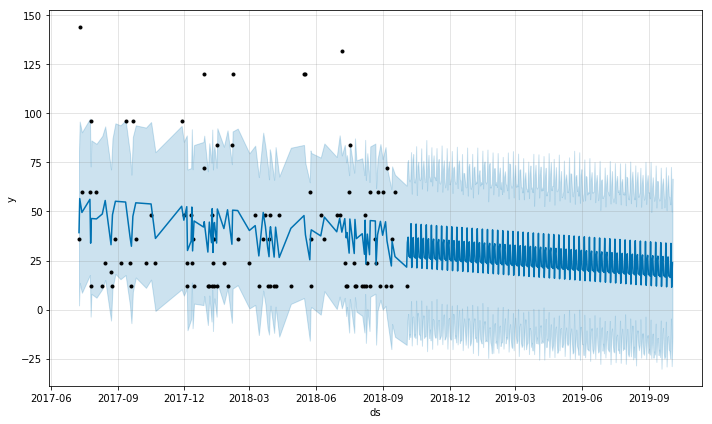

In [36]:
fig1 = m.plot(forecast)

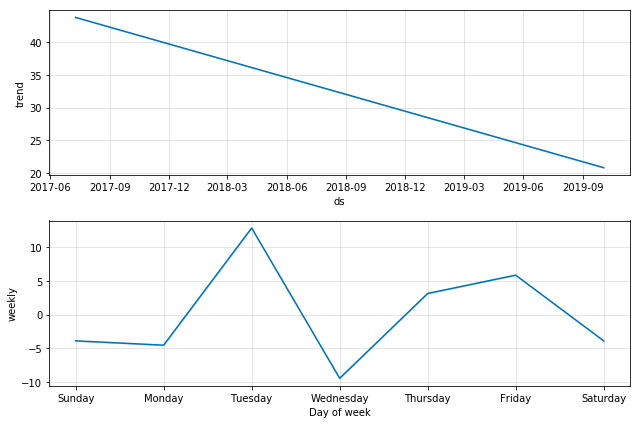

In [37]:
fig2 = m.plot_components(forecast)

In [38]:
metric_df = forecast.set_index('ds')[['yhat']].join(sample_period.set_index('ds').y).reset_index()

In [39]:
metric_df.dropna(inplace=True)

In [40]:
r2_score(metric_df.y, metric_df.yhat)

0.07636352456844364

In [41]:
mean_absolute_error(metric_df.y, metric_df.yhat)

24.380115918363167

In [ ]:
forecast

In [ ]:
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.to_period('M')

In [ ]:
forecast_month = pd.DataFrame(forecast.groupby('ds')['yhat'].mean())
forecast_month.head(5)

In [ ]:
forecast_month

### 2) Upward trend showcase

In [ ]:
sample1 = sale.loc[sale['Style_Color'] == 'DTA4E2531JET']
sample1

In [ ]:
sample_period1 = pd.DataFrame(sample1.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()

In [ ]:
sample_period1 = sample_period1.drop('Style_Color', axis = 1)

In [ ]:
sample_period1 = sample_period1.rename(columns={'INVC DATE': 'ds'})

In [ ]:
sample_period1 = sample_period1.rename(columns={'QTY':'y'})

In [ ]:
print(sample_period1['ds'].max())
print(sample_period1['ds'].min())

In [ ]:
m1 = Prophet()
m1.fit(sample_period1)

In [ ]:
future1 = m1.make_future_dataframe(periods=60, freq = 'D')

In [ ]:
forecast1 = m.predict(future1)
forecast1[['ds', 'yhat']]

In [ ]:
fig3 = m.plot(forecast1)

In [ ]:
fig4 = m.plot_components(forecast1)

In [ ]:
forecast1['ds'] = pd.to_datetime(forecast1['ds']).dt.to_period('M')

In [ ]:
forecast1.loc[forecast1['ds'] >= 2018-11]